# 강의 : https://www.edwith.org/boostcourse-ds-511/joinLectures/40396
# 강의자 repo : https://github.com/corazzon/boostcourse-ds-511

# 2.1 EDA를 통해 데이터 탐색하기

## 환경 세팅

In [1]:
!git clone https://github.com/corazzon/boostcourse-ds-511.git
!ls

Cloning into 'boostcourse-ds-511'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 67 (delta 32), reused 49 (delta 16), pack-reused 0
Unpacking objects: 100% (67/67), done.
boostcourse-ds-511  sample_data


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## 2.1.1 당뇨병 데이터셋 미리보기
- 데이터셋 로드
- 컬럼별 타입, 결측치, 기초통계량 확인

In [3]:
diabetes_df = pd.read_csv('boostcourse-ds-511/data/diabetes.csv')
print(diabetes_df.shape)
diabetes_df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# 컬럼별 타입 확인
diabetes_df.info()
print('\n')

# 컬럼별 결측치 확인
display(diabetes_df.isna().sum().reset_index().rename(columns={'index':'column', 0:'no_of_na'}).T)
print('\n')

# 컬럼별 기초통계량 확인
display(diabetes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB




,0,1,2,3,4,5,6,7,8
column,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
no_of_na,0,0,0,0,0,0,0,0,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 당뇨병 데이터셋의 모든 컬럼은 수치형 데이터
- 모든 컬럼에는 결측치 없음
- Glucose, BloodPressure, SkinThickness, Insulin, BMI 등은 현실적으로 0일 수 없는데 최솟값이 0으로 나타남. 해당 값이 0인 데이터는 이상치 혹은 결측치일 가능성이 높음

## 2.1.2 결측치 보기
- input feature에서 값이 0인 경우, 결측치라고 판단해 np.nan으로 변환
- 컬럼별 결측치 분포 확인 및 시각화

In [5]:
feature_names = diabetes_df.columns[:-1]
null_df = diabetes_df[feature_names].drop(columns='Pregnancies').replace(0, np.nan)

# 컬럼별 결측치 갯수 및 비율 확인
print('>>> Number & Percent of Null values in each column\n')
pd.concat([null_df.isna().sum(), null_df.isna().mean() * 100], axis=1).rename(columns={0:'Count', 1:'Percent'})

>>> Number & Percent of Null values in each column



,Count,Percent
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000


- Insulin, SkinThickness 열에서 결측치 비율이 높은 것으로 나타남

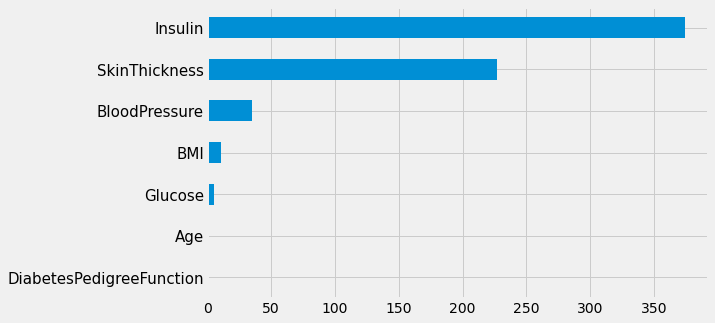

In [6]:
# 컬럼별 결측치 시각화 - 막대그래프
null_df.isna().sum().sort_values().plot.barh(figsize=(8, 5))
plt.yticks(fontsize=15)
plt.show()

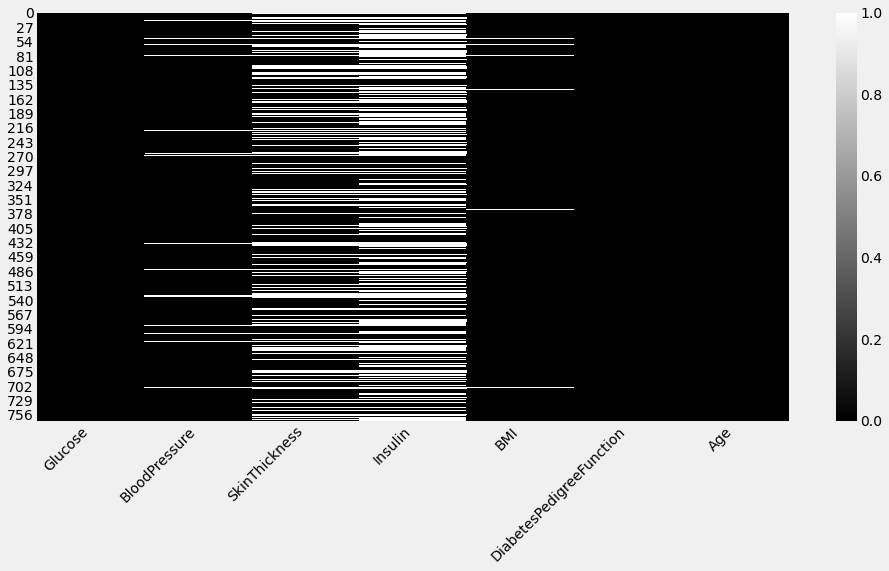

In [7]:
# 컬럼별 결측치 시각화 - 히트맵
plt.figure(figsize=(15, 7))
sns.heatmap(null_df.isna(), cmap='gray')
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.show()

## 2.1.3 훈련과 예측에 사용할 정답값을 시각화로 보기
- 데이터셋 정답값(label)인 당뇨병(Outcome)의 비율 확인 및 시각화 - 일변량
- 임신 횟수(Pregnancies)에 따른 당뇨병 비율 비교 및 시각화 - 일/이변량
- 새로운 속성(Pregnancies_high)에 따른 당뇨병 비율 비교 및 시각화 - 일/이변량

### 1) 당뇨병 비율 확인 및 시각화

In [8]:
label_count_df = diabetes_df['Outcome'].value_counts()
label_count_df = pd.concat([ label_count_df, label_count_df / diabetes_df.shape[0] * 100 ], axis=1)
label_count_df.columns = ['Count', 'Percent']

print('>>> Number & Percent of each label (in Outcome column)\n')
label_count_df

>>> Number & Percent of each label (in Outcome column)



,Count,Percent
0,500,65.104167
1,268,34.895833


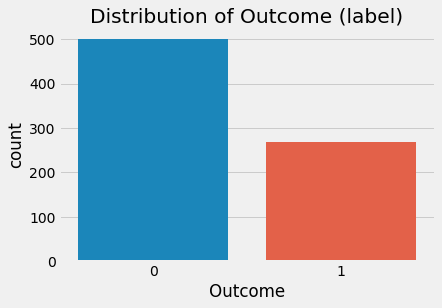

In [9]:
sns.countplot(diabetes_df['Outcome']).set_title('Distribution of Outcome (label)')
plt.show()

### 2) 임신 횟수에 따른 당뇨병 비율 비교 및 시각화

In [10]:
diabetes_df.groupby('Pregnancies')['Outcome'].agg(['count', 'sum', 'mean']).\
  rename(columns={'sum':'ill_count', 'mean':'ill_ratio'}).round(3).T

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
count,111.000,135.000,103.000,75.00,68.000,57.000,50.00,45.000,38.000,28.000,24.000,11.000,9.000,10.0,2.0,1.0,1.0
ill_count,38.000,29.000,19.000,27.00,23.000,21.000,16.00,25.000,22.000,18.000,10.000,7.000,4.000,5.0,2.0,1.0,1.0
ill_ratio,0.342,0.215,0.184,0.36,0.338,0.368,0.32,0.556,0.579,0.643,0.417,0.636,0.444,0.5,1.0,1.0,1.0


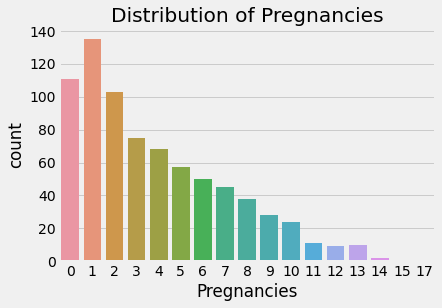

In [11]:
sns.countplot(diabetes_df.Pregnancies).set_title('Distribution of Pregnancies')
plt.show()

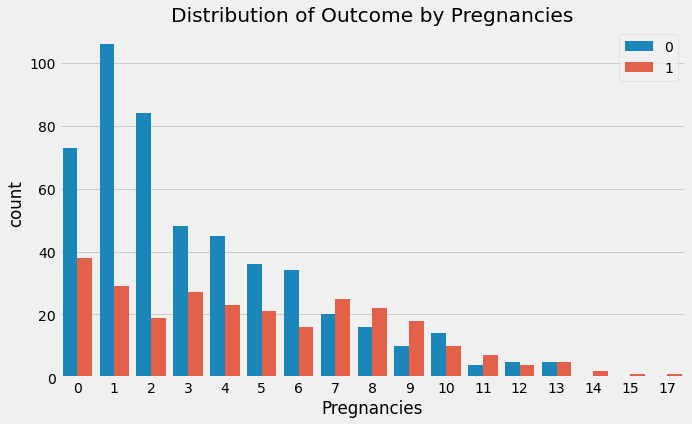

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes_df).set_title('Distribution of Outcome by Pregnancies')
plt.legend(loc='upper right')
plt.show()

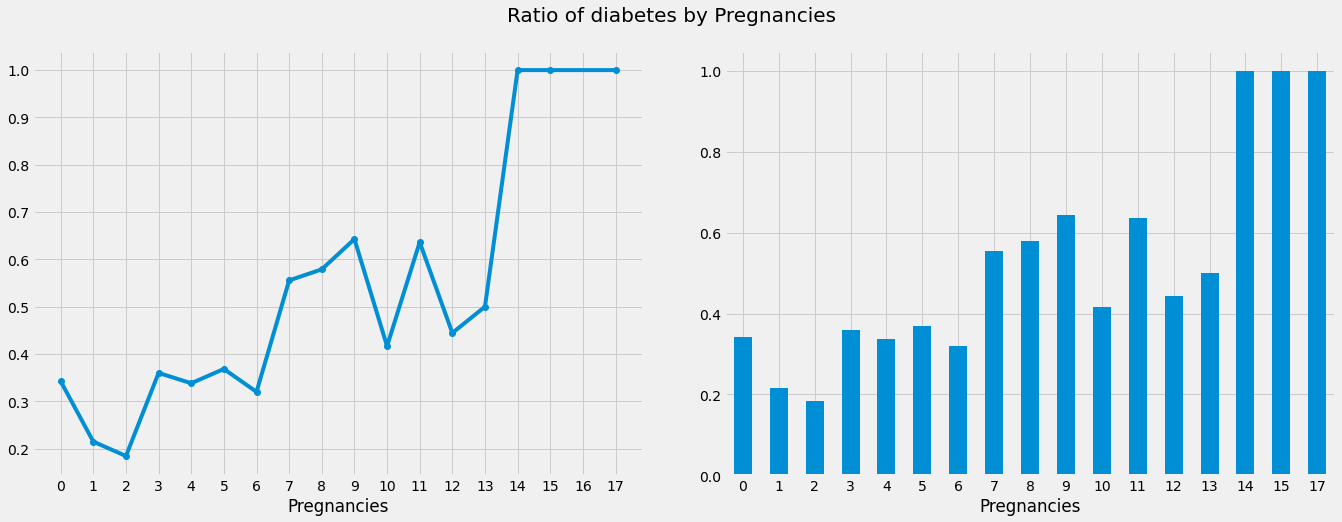

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

diabetes_df.groupby('Pregnancies')['Outcome'].mean().plot(style='-o', ax=ax[0])
diabetes_df.groupby('Pregnancies')['Outcome'].mean().plot.bar(rot=0, ax=ax[1])

ax[0].set_xticks(range(0, 18))
plt.suptitle('Ratio of diabetes by Pregnancies', fontsize=20)
plt.tight_layout(pad=4)
plt.show()

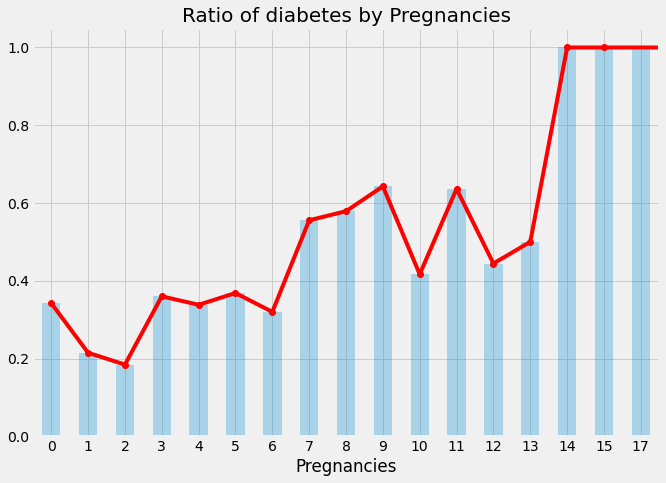

In [14]:
# Another way
plt.figure(figsize=(10, 7))
diabetes_df.groupby('Pregnancies')['Outcome'].mean().plot.bar(alpha=0.3)
diabetes_df.groupby('Pregnancies')['Outcome'].mean().plot(style='-o', color='red')
plt.title('Ratio of diabetes by Pregnancies', fontsize=20)
plt.show()

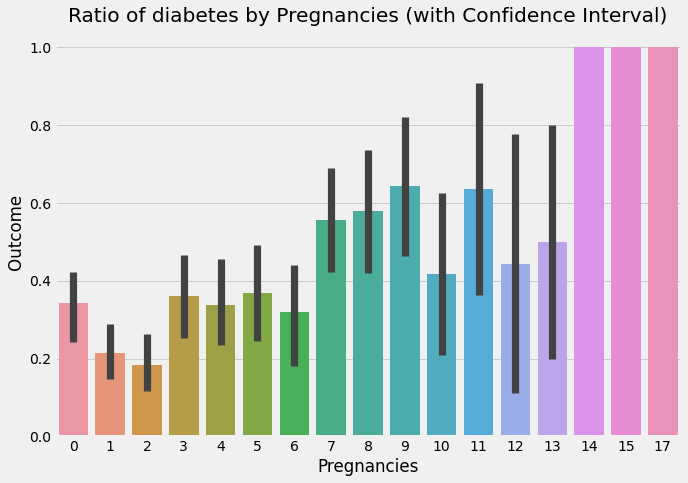

In [15]:
# Another way - 95% 신뢰구간 표시
plt.figure(figsize=(10, 7))
sns.barplot(x='Pregnancies', y='Outcome', data=diabetes_df)
plt.title('Ratio of diabetes by Pregnancies (with Confidence Interval)')
plt.show()

### 3) 새로운 속성(Pregnancies_high)에 따른 당뇨병 비율 비교 및 시각화
- 임신 횟수에 따른 당뇨병 비율을 시각화한 결과, 임신 횟수가 6회를 넘어가는 경우 당뇨병 비율이 상당히 높아지는 것을 확인함
- 위 시각화 결과를 활용해 새로운 속성 Pregnancies_high를 정의하고, 이에 따른 당뇨병 비율을 비교함

In [16]:
diabetes_df['Pregnancies_high'] = (diabetes_df['Pregnancies'] > 6).astype(int)
diabetes_df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,0
1,1,0
2,8,1
3,1,0
4,0,0


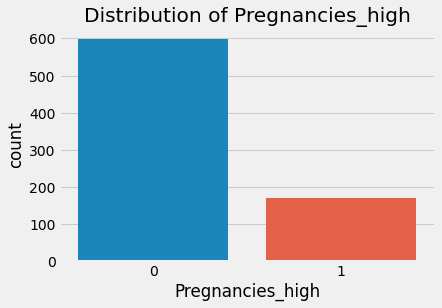

In [17]:
sns.countplot(diabetes_df['Pregnancies_high']).set_title('Distribution of Pregnancies_high')
plt.show()

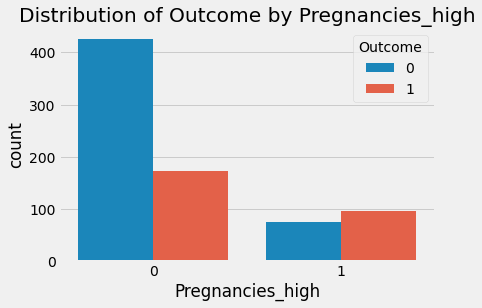

In [18]:
sns.countplot(x='Pregnancies_high', hue='Outcome', data=diabetes_df).set_title('Distribution of Outcome by Pregnancies_high')
plt.show()